<a href="https://colab.research.google.com/github/cdfritz7/ACPWebsite/blob/main/Copy_of_Sophie_Brandeis_FINAL_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

The music data set I am working with is a subset of the Kaggle dataset: [Spotify Charts](https://). Spotify publishes a new chart every 2-3 days and this dataset tracks its entire collection of published charts from January 1, 2017 to December 31, 2021 world-wide. The original dataset contains over 26 million observations based on Spotify's Top 200 and Viral 50 charts. Since 26 million observations is an immensely large quantity of data, I decided to clean the original dataset into a more manageable one. I decided to only focus on countries where the main language is English so that I would be able to focus mainly on artists and songs that I know. This adjustment brought me down to 4 countries, the US, the UK, Australia and Canada. Next, I decided to only look at the Top 200 charts, rather than the Viral 50. I did this because I am more interested in music that is doing well on Spotify based on content, not Tik Tok trends. Lastly, I removed the column where the Spotify link was included because it was unnecessary for my project. Overall, my subset includes 361,873 observations of the original 26 million. 

The dataset contains the following columns: 
- title: The title of the song.
- rank: number describing the song's popularity relative to the others.
- date: Day, monh and year of the top 200 chart release.
- artist: person who sings the song that placed in the Top 200 on the day.
- region: Country the song placed in the Top 200 in, in this project only Australia, UK, US and Canada.
- chart: Either top 200 or Viral 50. In this case, only the top 200.
- trend: Whether the song moved up, down, or stayed the same from its - - - rankings in the previous Top 200
- streams: the number of streams the song received

Throughout this project I investigated which artists were most successful overall in all 4 regions, in each individual region and in certain years. I defined success in two different ways: total appearances on the Top 200 Spotify Charts and total number of streams their songs received. I visualized this data through bar graphs and scatterplots and was able to conclude that the amount of times an artist is featured on the Top 200 Charts is often also correlated with streaming success, however it is not exact. In other words, since this data is recorded over the duration of 3 years "one hit wonders" who release a hit song that is featured on Top 200 Chart for a few days will not prove significant in the overall distributions. The big name artists who have dedicated fanbases write hits and generate longevity in streams. From this conclusion, I decided to use an artist’s total streams as the driving value behind calculating an artist’s popularity score because I decided it is a more indicicative measure of success. At the end of this report, you will find an experiment that I conducted from my own research and the insights from the Spotify dataset where I measured and compared how “mainstream” my friend’s music tastes are. 



### Loading Data and Importing Packages

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv("music data csv .csv") 

In [ ]:
df

,title,rank,date,artist,region,chart,trend,streams
0,Starboy,1,1/1/2017,"The Weeknd, Daft Punk",Australia,top200,MOVE_UP,107350
1,Rockabye (feat. Sean Paul & Anne-Marie),2,1/1/2017,Clean Bandit,Australia,top200,MOVE_UP,105111
2,Closer,3,1/1/2017,"The Chainsmokers, Halsey",Australia,top200,MOVE_DOWN,100617
3,I Don’t Wanna Live Forever (Fifty Shades Darke...,4,1/1/2017,"ZAYN, Taylor Swift",Australia,top200,MOVE_UP,88335
4,Call On Me - Ryan Riback Extended Remix,5,1/1/2017,Starley,Australia,top200,MOVE_UP,83729
...,...,...,...,...,...,...,...,...
361868,Location,46,1/31/2018,Khalid,United States,top200,MOVE_DOWN,490047
361869,"King's Dead (with Kendrick Lamar, Future & Jam...",47,1/31/2018,Jay Rock,United States,top200,MOVE_UP,489847
361870,This Is Me,48,1/31/2018,"Keala Settle, The Greatest Showman Ensemble",United States,top200,MOVE_DOWN,484681
361871,I Get the Bag (feat. Migos),49,1/31/2018,Gucci Mane,United States,top200,MOVE_UP,481263


This is the raw dataset that I uploaded into Python. There are 361873 songs that are featured over 3 years of Spotify Top 200 Charts in the United States, Australia, the UK and Canada.

###  Popular artists accross all 4 regions

In this first section I investigated artist popularity over all four regions featured. The first visualization shows the 20 artists that were featured the most times on the Top 200 Charts. The visualization, "Overall Appearances Accross All Regions" shows that the artists Drake, Post Malone and Ed Sheeran had the most appearances on the Top 200 Charts.

I then went on to investigate popularity based on streams rather than just count of appearances. In order to accomplish this, I created a new dataset where I manipulated the orginal dataset by grouping together arists. From this dataset, I created a dataframe where I added two columns: the artists and the sum of all of their streams accross every song that was featured in the Spotify's Top 200 dataset. This is where the visualization, "Overall Streams Accross All Regions" comes from. As expected, the visualization includes many of the same as the counts visualization. However, there is a change of order and a few different appearances such as The Weekend and Cardi B. 

From these visualizations it is important to note that the artists who frequent the Top 200 charts are seasoned professionals and therefor they have dedicated fanbases who provide a consistent source of streams. It is important to note that these visualizations are created from data that stretches over 3 years and because of this a one hit wonder will not appear significant.

In [ ]:
counts = df['artist'].value_counts()

In [ ]:
counts.head(20)

Drake             11081
Post Malone       10366
Ed Sheeran         9373
Ariana Grande      7148
Billie Eilish      6927
Juice WRLD         6791
The Weeknd         6081
Dua Lipa           5579
Olivia Rodrigo     4863
Justin Bieber      4862
Lewis Capaldi      4596
Khalid             4550
Doja Cat           4391
XXXTENTACION       4352
Taylor Swift       4324
Lil Nas X          3876
Travis Scott       3731
Harry Styles       3576
Pop Smoke          3509
Kendrick Lamar     3378
Name: artist, dtype: int64

In [ ]:
overallappearances = counts.head(20)

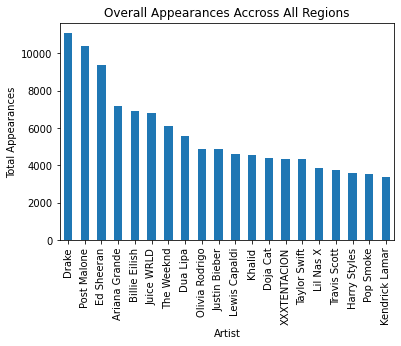

In [ ]:
overallappearances.plot(kind='bar')
plt.ylabel('Total Appearances')
plt.xlabel('Artist')
plt.title('Overall Appearances Accross All Regions');

This visualization features the top 20 most featured artists on Spotify's Top 200 charts over all three years in all four regions.

In [ ]:
dfstreams=df[['artist', 'streams']]

In [ ]:
dfstreams.head(20)

,artist,streams
0,"The Weeknd, Daft Punk",107350
1,Clean Bandit,105111
2,"The Chainsmokers, Halsey",100617
3,"ZAYN, Taylor Swift",88335
4,Starley,83729
5,James Arthur,81542
6,"The Weeknd, Daft Punk",81455
7,"NEIKED, Dyo",80609
8,"DJ Snake, Justin Bieber",75363
9,"Nevada, Mark Morrison, Fetty Wap",74950


In [ ]:
d2 = dfstreams.groupby(['artist'])

In [ ]:
new_df = pd.DataFrame({'sumstreams': d2['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
streamsgraph= new_df[['artist', 'sumstreams']].head(20)

In [ ]:
streamsgraph

,artist,sumstreams
358,Drake,4659276639
985,Post Malone,3885515577
599,Juice WRLD,2678846471
84,Ariana Grande,2562433264
392,Ed Sheeran,2473124563
167,Billie Eilish,2027896426
942,Olivia Rodrigo,1955990054
1185,The Weeknd,1785584010
1271,XXXTENTACION,1750557617
1150,Taylor Swift,1579147632


In [ ]:
streamsgraph=new_df.head(20)

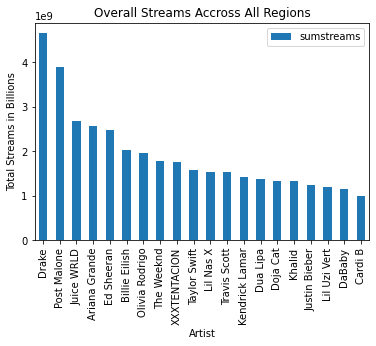

In [ ]:
streamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Billions')
plt.xlabel('Artist')
plt.title('Overall Streams Accross All Regions');

This visualization features the top 20 artists with the highest number of total streams on Spotify's Top 200 charts over all three years in all four regions.

### Popular Artists in Australia

In this section and the following three, I investigate the artists who have had the most success in individual countries. In this section I am focusing in on Australia. I found that Australians listen to Tones and I and Lewis Capaldi more than other countries which is an interesting takeaway. 

In [ ]:
df['region'].value_counts().head()

United States     91044
Australia         90542
Canada            90342
United Kingdom    89945
Name: region, dtype: int64

In [ ]:
Australiadf = df[(df.region == "Australia")]

In [ ]:
Australiadf

,title,rank,date,artist,region,chart,trend,streams
0,Starboy,1,1/1/2017,"The Weeknd, Daft Punk",Australia,top200,MOVE_UP,107350
1,Rockabye (feat. Sean Paul & Anne-Marie),2,1/1/2017,Clean Bandit,Australia,top200,MOVE_UP,105111
2,Closer,3,1/1/2017,"The Chainsmokers, Halsey",Australia,top200,MOVE_DOWN,100617
3,I Don’t Wanna Live Forever (Fifty Shades Darke...,4,1/1/2017,"ZAYN, Taylor Swift",Australia,top200,MOVE_UP,88335
4,Call On Me - Ryan Riback Extended Remix,5,1/1/2017,Starley,Australia,top200,MOVE_UP,83729
...,...,...,...,...,...,...,...,...
361718,No Limit,46,1/31/2018,"G-Eazy, A$AP Rocky, Cardi B",Australia,top200,SAME_POSITION,72698
361719,Too Good At Goodbyes,47,1/31/2018,Sam Smith,Australia,top200,MOVE_UP,72058
361720,Lay It on Me,48,1/31/2018,Vance Joy,Australia,top200,MOVE_DOWN,69389
361721,Perfect,49,1/31/2018,Ed Sheeran,Australia,top200,MOVE_DOWN,68911


In [ ]:
Australiaappearances= Australiadf['artist'].value_counts().head(20)

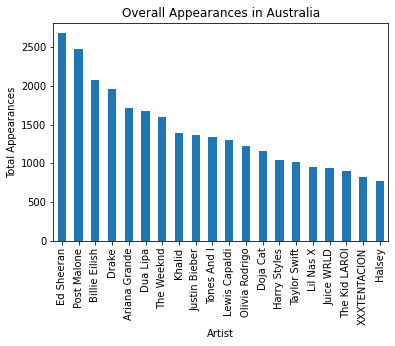

In [ ]:
Australiaappearances.plot(kind='bar')
plt.ylabel('Total Appearances')
plt.xlabel('Artist')
plt.title('Overall Appearances in Australia');

This visualization features the top 20 most featured artists on Spotify's Top 200 charts over all three years in Australia.


In [ ]:
dfstreamsaus=Australiadf[['artist', 'streams']]

In [ ]:
d2aus = dfstreamsaus.groupby(['artist'])

In [ ]:
aus_df = pd.DataFrame({'sumstreams': d2aus['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
ausstreamsgraph= aus_df[['artist', 'sumstreams']].head(20)

In [ ]:
ausstreamsgraph

,artist,sumstreams
160,Ed Sheeran,338813326
440,Post Malone,315958830
63,Billie Eilish,254126594
141,Drake,246082820
31,Ariana Grande,231842025
154,Dua Lipa,206408890
535,The Weeknd,189167947
417,Olivia Rodrigo,179021020
543,Tones And I,171919397
257,Justin Bieber,164306379


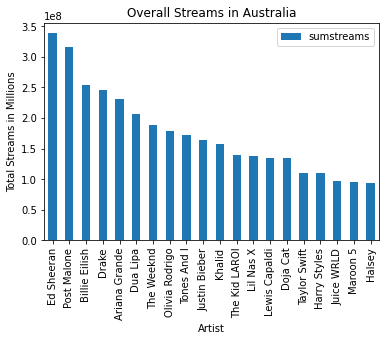

In [ ]:
ausstreamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Millions')
plt.xlabel('Artist')
plt.title('Overall Streams in Australia');

This visualization features the top 20 artists with the highest number of total streams on Spotify's Top 200 charts over all three years in Australia.


### Popular Artists in the United States

In this section I look at the top artists in only the United States. It is important to note that the United States has the highest amount of total streams which means that Americans collectively listen to more music on Spotify than Australia, Canada and the UK.

In [ ]:
USAdf = df[(df.region == "United States")]

In [ ]:
USAdf

,title,rank,date,artist,region,chart,trend,streams,year
150,Bad and Boujee (feat. Lil Uzi Vert),1,1/1/2017,Migos,United States,top200,SAME_POSITION,1371493,2017
151,Fake Love,2,1/1/2017,Drake,United States,top200,SAME_POSITION,1180074,2017
152,Starboy,3,1/1/2017,"The Weeknd, Daft Punk",United States,top200,SAME_POSITION,1064351,2017
153,Closer,4,1/1/2017,"The Chainsmokers, Halsey",United States,top200,SAME_POSITION,1010492,2017
154,Black Beatles,5,1/1/2017,"Rae Sremmurd, Gucci Mane",United States,top200,SAME_POSITION,874289,2017
...,...,...,...,...,...,...,...,...,...
361868,Location,46,1/31/2018,Khalid,United States,top200,MOVE_DOWN,490047,2018
361869,"King's Dead (with Kendrick Lamar, Future & Jam...",47,1/31/2018,Jay Rock,United States,top200,MOVE_UP,489847,2018
361870,This Is Me,48,1/31/2018,"Keala Settle, The Greatest Showman Ensemble",United States,top200,MOVE_DOWN,484681,2018
361871,I Get the Bag (feat. Migos),49,1/31/2018,Gucci Mane,United States,top200,MOVE_UP,481263,2018


In [ ]:
USAappearances= USAdf['artist'].value_counts().head(20)

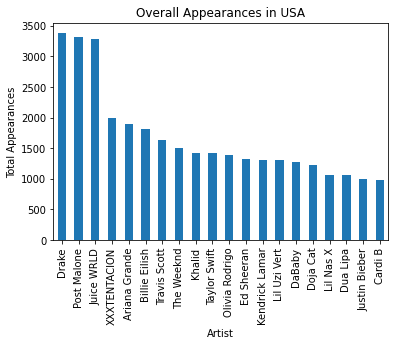

In [ ]:
USAappearances.plot(kind='bar')
plt.ylabel('Total Appearances')
plt.xlabel('Artist')
plt.title('Overall Appearances in USA');

This visualization features the top 20 most featured artists on Spotify's Top 200 charts over all three years in the United States.


In [ ]:
dfstreamsUSA=USAdf[['artist', 'streams']]

In [ ]:
USAdf = dfstreamsUSA.groupby(['artist'])

In [ ]:
USA_df = pd.DataFrame({'sumstreams': USAdf['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
USAstreamsgraph= USA_df[['artist', 'sumstreams']].head(20)

In [ ]:
USAstreamsgraph

,artist,sumstreams
223,Drake,3349607731
603,Post Malone,2861699768
353,Juice WRLD,2254934845
58,Ariana Grande,1661959601
774,XXXTENTACION,1483090091
577,Olivia Rodrigo,1328139140
115,Billie Eilish,1309747101
735,Travis Scott,1250664838
698,Taylor Swift,1201240444
387,Kendrick Lamar,1148711404


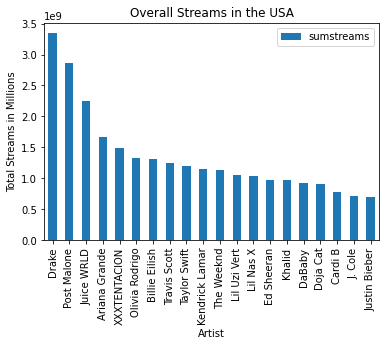

In [ ]:
USAstreamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Millions')
plt.xlabel('Artist')
plt.title('Overall Streams in the USA');

This visualization features the top 20 artists with the highest number of total streams on Spotify's Top 200 charts over all three years in the United States.

### Popular Artists in the UK

This section features the most popular artists in the UK. Ed Sheeran is the most popular in both streaming and appearance categories which is different than any of the other regions we look at. This is most likely due to Ed Sheeran being from the UK originally. 

In [ ]:
UKdf = df[(df.region == "United Kingdom")]

In [ ]:
UKdf

,title,rank,date,artist,region,chart,trend,streams,year
100,Rockabye (feat. Sean Paul & Anne-Marie),1,1/1/2017,Clean Bandit,United Kingdom,top200,SAME_POSITION,272020,2017
101,Starboy,2,1/1/2017,"The Weeknd, Daft Punk",United Kingdom,top200,SAME_POSITION,209873,2017
102,Say You Won't Let Go,3,1/1/2017,James Arthur,United Kingdom,top200,MOVE_UP,194633,2017
103,Sexual,4,1/1/2017,"NEIKED, Dyo",United Kingdom,top200,SAME_POSITION,184896,2017
104,I Would Like,5,1/1/2017,Zara Larsson,United Kingdom,top200,MOVE_UP,182520,2017
...,...,...,...,...,...,...,...,...,...
361818,Perfect,46,1/31/2018,Ed Sheeran,United Kingdom,top200,MOVE_DOWN,124817,2018
361819,From Now On,47,1/31/2018,"Hugh Jackman, The Greatest Showman Ensemble",United Kingdom,top200,MOVE_DOWN,123919,2018
361820,Unforgettable,48,1/31/2018,"French Montana, Swae Lee",United Kingdom,top200,MOVE_UP,121816,2018
361821,Finders Keepers,49,1/31/2018,"Mabel, Kojo Funds",United Kingdom,top200,MOVE_UP,118064,2018


In [ ]:
UKappearances= UKdf['artist'].value_counts().head(20)

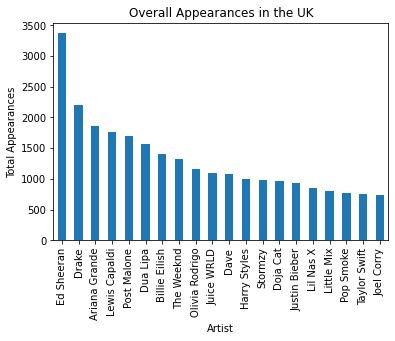

In [ ]:
UKappearances.plot(kind='bar')
plt.ylabel('Total Appearances')
plt.xlabel('Artist')
plt.title('Overall Appearances in the UK');

This visualization features the top 20 most featured artists on Spotify's Top 200 charts over all three years in the UK.


In [ ]:
dfstreamsUK=UKdf[['artist', 'streams']]

In [ ]:
UKdf = dfstreamsUK.groupby(['artist'])

In [ ]:
UK_df = pd.DataFrame({'sumstreams': UKdf['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
UKstreamsgraph= UK_df[['artist', 'sumstreams']].head(20)

In [ ]:
UKstreamsgraph

,artist,sumstreams
229,Ed Sheeran,928926903
202,Drake,578480008
44,Ariana Grande,462359207
409,Lewis Capaldi,385156755
553,Post Malone,370687638
220,Dua Lipa,343171934
534,Olivia Rodrigo,298822397
83,Billie Eilish,287512769
677,The Weeknd,272810403
642,Stormzy,228275998


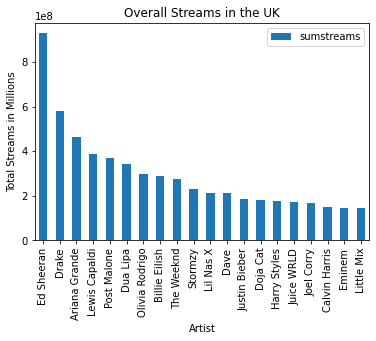

In [ ]:
UKstreamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Millions')
plt.xlabel('Artist')
plt.title('Overall Streams in the UK');

This visualization features the top 20 artists with the highest number of total streams on Spotify's Top 200 charts over all three years in the UK.

### Popuar Artists in Canada

In this section the top artists in Canada are investigated. Similar to the UK, Canada has an artist, Drake, that is much more popular in their region relative to others. Just like Ed Sheeran in the UK, the reasoning for Drake in Canada is most likely because he is from Canada.

In [ ]:
Canadadf = df[(df.region == "Canada")]

In [ ]:
Canadadf

,title,rank,date,artist,region,chart,trend,streams
50,Starboy,1,1/1/2017,"The Weeknd, Daft Punk",Canada,top200,SAME_POSITION,139175
51,Closer,2,1/1/2017,"The Chainsmokers, Halsey",Canada,top200,MOVE_UP,128481
52,Fake Love,3,1/1/2017,Drake,Canada,top200,MOVE_DOWN,118532
53,Bad and Boujee (feat. Lil Uzi Vert),4,1/1/2017,Migos,Canada,top200,SAME_POSITION,100524
54,One Dance,5,1/1/2017,"Drake, WizKid, Kyla",Canada,top200,MOVE_UP,90257
...,...,...,...,...,...,...,...,...
361768,BBO (Bad Bitches Only),46,1/31/2018,"Migos, 21 Savage",Canada,top200,MOVE_DOWN,61082
361769,Rewrite The Stars,47,1/31/2018,"Zac Efron, Zendaya",Canada,top200,MOVE_UP,58445
361770,Bank Account,48,1/31/2018,21 Savage,Canada,top200,MOVE_DOWN,56802
361771,What Lovers Do (feat. SZA),49,1/31/2018,Maroon 5,Canada,top200,SAME_POSITION,56466


In [ ]:
Canadaappearances= Canadadf['artist'].value_counts().head(20)

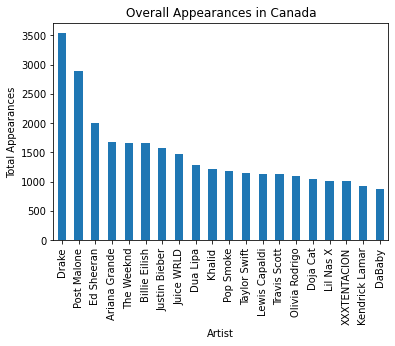

In [ ]:
Canadaappearances.plot(kind='bar')
plt.ylabel('Total Appearances')
plt.xlabel('Artist')
plt.title('Overall Appearances in Canada');

This visualization features the top 20 most featured artists on Spotify's Top 200 charts over all three years in Canada.

In [ ]:
dfstreamsCAN=Canadadf[['artist', 'streams']]

In [ ]:
Canadadf = dfstreamsCAN.groupby(['artist'])

In [ ]:
CAN_df = pd.DataFrame({'sumstreams': Canadadf['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
Canadastreamsgraph= CAN_df[['artist', 'sumstreams']].head(20)

In [ ]:
Canadastreamsgraph

,artist,sumstreams
183,Drake,485106080
550,Post Malone,337169341
211,Ed Sheeran,234370107
47,Ariana Grande,206272431
664,The Weeknd,190391782
315,Justin Bieber,178162921
87,Billie Eilish,176509962
394,Lil Nas X,158848364
311,Juice WRLD,155644616
528,Olivia Rodrigo,150007497


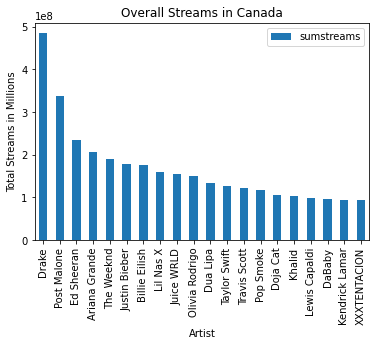

In [ ]:
Canadastreamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Millions')
plt.xlabel('Artist')
plt.title('Overall Streams in Canada');

This visualization features the top 20 artists with the highest number of total streams on Spotify's Top 200 charts over all three years in Canada.


### Tracking artist success by year 

In this portion of the project, I broke the dataset up into years so that I can investigate success in individual years. As mentioned in my introduction, I am using streams as my key indicator of success. At the end of this section, I have included all three years in visualizations next to each other for easy comparison.

In [ ]:
df.head(3)

,title,rank,date,artist,region,chart,trend,streams
0,Starboy,1,1/1/2017,"The Weeknd, Daft Punk",Australia,top200,MOVE_UP,107350
1,Rockabye (feat. Sean Paul & Anne-Marie),2,1/1/2017,Clean Bandit,Australia,top200,MOVE_UP,105111
2,Closer,3,1/1/2017,"The Chainsmokers, Halsey",Australia,top200,MOVE_DOWN,100617


In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
df[['artist', 'title','streams','year']].head()

,artist,title,streams,year
0,"The Weeknd, Daft Punk",Starboy,107350,2017
1,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),105111,2017
2,"The Chainsmokers, Halsey",Closer,100617,2017
3,"ZAYN, Taylor Swift",I Don’t Wanna Live Forever (Fifty Shades Darke...,88335,2017
4,Starley,Call On Me - Ryan Riback Extended Remix,83729,2017


In [ ]:
dfyear=df[['artist', 'title','streams','year']]

In [ ]:
dfyear2017 = dfyear[dfyear['year'] == 2017]

In [ ]:
dfyear2017

,artist,title,streams,year
0,"The Weeknd, Daft Punk",Starboy,107350,2017
1,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),105111,2017
2,"The Chainsmokers, Halsey",Closer,100617,2017
3,"ZAYN, Taylor Swift",I Don’t Wanna Live Forever (Fifty Shades Darke...,88335,2017
4,Starley,Call On Me - Ryan Riback Extended Remix,83729,2017
...,...,...,...,...
361368,Demi Lovato,Tell Me You Love Me,432289,2017
361369,Demi Lovato,Sorry Not Sorry,424287,2017
361370,NAV,Wanted You (feat. Lil Uzi Vert),420113,2017
361371,Lil Uzi Vert,The Way Life Goes (feat. Oh Wonder),414829,2017


In [ ]:
dfstreams2017=dfyear2017[['artist', 'streams']]

In [ ]:
d22017 = dfstreams2017.groupby(['artist'])

In [ ]:
yr2017_df = pd.DataFrame({'sumstreams': d22017['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
yr2017streamsgraph= yr2017_df[['artist', 'sumstreams']].head(20)

In [ ]:
yr2017streamsgraph

,artist,sumstreams
116,Ed Sheeran,1199006618
194,Kendrick Lamar,1074443779
98,Drake,665446034
215,Lil Uzi Vert,516368876
264,Migos,415842378
196,Khalid,410334459
81,DJ Khaled,381081256
237,"Luis Fonsi, Daddy Yankee, Justin Bieber",353434610
308,"Post Malone, Quavo",350701011
57,"Calvin Harris, Funk Wav",343760177


In [ ]:
dfyear2018 = dfyear[dfyear['year'] == 2018]

In [ ]:
dfyear2018

,artist,title,streams,year
300,Drake,God's Plan,377837,2018
301,Post Malone,Psycho (feat. Ty Dolla $ign),340699,2018
302,Kendrick Lamar,All The Stars (with SZA),249560,2018
303,Post Malone,I Fall Apart,187239,2018
304,Bazzi,Mine,181584,2018
...,...,...,...,...
361868,Khalid,Location,490047,2018
361869,Jay Rock,"King's Dead (with Kendrick Lamar, Future & Jam...",489847,2018
361870,"Keala Settle, The Greatest Showman Ensemble",This Is Me,484681,2018
361871,Gucci Mane,I Get the Bag (feat. Migos),481263,2018


In [ ]:
dfstreams2018=dfyear2018[['artist', 'streams']]

In [ ]:
d22018 = dfstreams2018.groupby(['artist'])

In [ ]:
yr2018_df = pd.DataFrame({'sumstreams': d22018['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
yr2018streamsgraph= yr2018_df[['artist', 'sumstreams']].head(20)

In [ ]:
yr2018streamsgraph

,artist,sumstreams
121,Drake,2049087620
341,Post Malone,1812913643
433,XXXTENTACION,1347319490
36,Ariana Grande,681548699
200,Juice WRLD,649738592
416,Travis Scott,622582564
217,Khalid,411797422
139,Eminem,383049980
216,Kendrick Lamar,332626754
80,"Cardi B, Bad Bunny, J Balvin",304924744


In [ ]:
dfyear2019 = dfyear[dfyear['year'] == 2019]

In [ ]:
dfyear2019

,artist,title,streams,year
70250,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,235128,2019
70251,Ariana Grande,"thank u, next",208884,2019
70252,Halsey,Without Me,199646,2019
70253,Post Malone,Wow.,184674,2019
70254,Ava Max,Sweet but Psycho,181987,2019
...,...,...,...,...
195695,Post Malone,Goodbyes (Feat. Young Thug),483807,2019
195696,"Trippie Redd, DaBaby",Death,478399,2019
195697,French Montana,"Writing on the Wall (feat. Post Malone, Cardi ...",471678,2019
195698,J. Cole,MIDDLE CHILD,465864,2019


In [ ]:
dfstreams2019=dfyear2019[['artist', 'streams']]

In [ ]:
d22019 = dfstreams2019.groupby(['artist'])

In [ ]:
yr2019_df = pd.DataFrame({'sumstreams': d22019['streams'].sum()}).reset_index().sort_values(by=['sumstreams'], ascending=False)

In [ ]:
yr2019streamsgraph= yr2019_df[['artist', 'sumstreams']].head(20)

In [ ]:
yr2019streamsgraph

,artist,sumstreams
327,Post Malone,1460081345
43,Billie Eilish,1175806590
18,Ariana Grande,1156757806
129,Ed Sheeran,707868082
245,Lil Nas X,645203830
328,"Post Malone, Swae Lee",548594313
205,Juice WRLD,545814562
219,Khalid,491802172
238,Lewis Capaldi,470494544
256,Lizzo,420594963


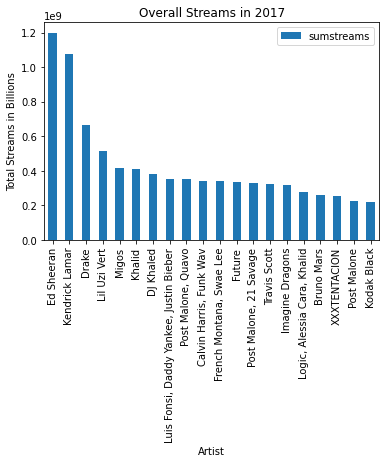

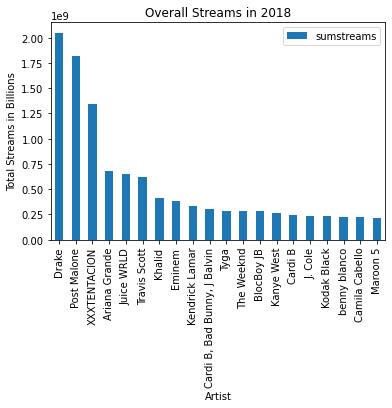

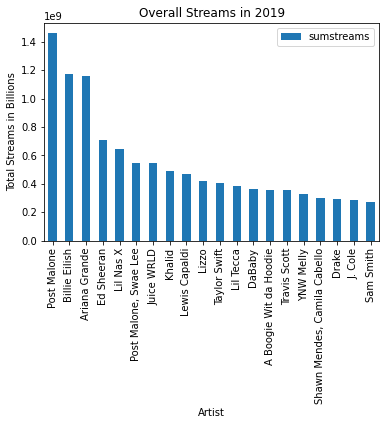

In [ ]:
yr2017streamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Billions')
plt.xlabel('Artist')
plt.title('Overall Streams in 2017');
yr2018streamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Billions')
plt.xlabel('Artist')
plt.title('Overall Streams in 2018');
yr2019streamsgraph.plot(x="artist", kind="bar")
plt.ylabel('Total Streams in Billions')
plt.xlabel('Artist')
plt.title('Overall Streams in 2019');

These three graphs measure total streams of the top artists in each year. Although they are not directly compariable because the years feature different top artists there are still some valuable takeaways. The first takeway are the repeats, artists who place in the top 20 for total streams in all three years. Some of these "timeless artists" are Post Malone and Drake. It is important to note that a shortcoming of this dataset is that it only tracks 3 years. My guess is that if this went back 30 years artists who are timeless will be very different than artists who appear to be timeless over this 3 year time span. Another take away from these visualizations is the amount of streams each year. It seems that 2018 had the most streams and one could assume the best music released out of all three of the years. It would be interesting to look at the data from 202 when the pandemic hit and see how many total streams the top 20 artists brought in.

### Individual Artists

In this section I looked at 3 of the most consitantly popular and successul artists, Post Malone, Ed Sheeran and Drake. I narrowed in on just these individual artists and tracked their streams overtime. This works nicely with these artists because they are all three popular in the sense that they have consistant streaming but they all also release tons of new music that often gets featured on the Top 200. In all three of these visualizations it is clear when a new song is released because the streams soar up and then dip down. This is also replicable to any artist and is in the form of a scatterplot because it tracks streaming patterns over time.

In [ ]:
postmalonedf = df[(df.artist == "Post Malone")]

In [ ]:
postmalonedf

,title,rank,date,artist,region,chart,trend,streams,year
301,Psycho (feat. Ty Dolla $ign),2,3/1/2018,Post Malone,Australia,top200,SAME_POSITION,340699,2018
303,I Fall Apart,4,3/1/2018,Post Malone,Australia,top200,SAME_POSITION,187239,2018
329,Candy Paint,30,3/1/2018,Post Malone,Australia,top200,MOVE_UP,97954,2018
352,Psycho (feat. Ty Dolla $ign),2,3/1/2018,Post Malone,Canada,top200,SAME_POSITION,333922,2018
365,I Fall Apart,15,3/1/2018,Post Malone,Canada,top200,MOVE_UP,99914,2018
...,...,...,...,...,...,...,...,...,...
361697,Candy Paint,25,1/31/2018,Post Malone,Australia,top200,MOVE_UP,100640,2018
361731,I Fall Apart,9,1/31/2018,Post Malone,Canada,top200,MOVE_UP,106470,2018
361801,I Fall Apart,28,1/31/2018,Post Malone,United Kingdom,top200,MOVE_DOWN,171966,2018
361829,I Fall Apart,7,1/31/2018,Post Malone,United States,top200,SAME_POSITION,963598,2018


In [ ]:
postmalonegraph=postmalonedf[['date', 'streams']]

In [ ]:
postmalonegraph

,date,streams
301,3/1/2018,340699
303,3/1/2018,187239
329,3/1/2018,97954
352,3/1/2018,333922
365,3/1/2018,99914
...,...,...
361697,1/31/2018,100640
361731,1/31/2018,106470
361801,1/31/2018,171966
361829,1/31/2018,963598


Text(0.5, 1.0, 'Post Malone Streams Over Time')

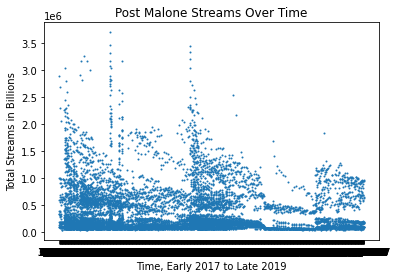

In [ ]:
post = postmalonegraph.plot.scatter(x='date',
                      y='streams', s=1)
plt.ylabel('Total Streams in Billions')
plt.xlabel('Time, Early 2017 to Late 2019')
plt.title('Post Malone Streams Over Time')

This visualization tracks Post Malone's streams over all three years. It is clear that he had 3 massive hits and from the spikes in the plot. 

In [ ]:
Drakedf = df[(df.artist == "Drake")]

In [ ]:
Drakedf

,title,rank,date,artist,region,chart,trend,streams,year
19,Fake Love,20,1/1/2017,Drake,Australia,top200,MOVE_DOWN,62524,2017
52,Fake Love,3,1/1/2017,Drake,Canada,top200,MOVE_DOWN,118532,2017
97,Controlla,48,1/1/2017,Drake,Canada,top200,MOVE_UP,40453,2017
114,Fake Love,15,1/1/2017,Drake,United Kingdom,top200,MOVE_UP,147038,2017
141,Controlla,42,1/1/2017,Drake,United Kingdom,top200,MOVE_UP,82401,2017
...,...,...,...,...,...,...,...,...,...
361743,Diplomatic Immunity,21,1/31/2018,Drake,Canada,top200,MOVE_DOWN,88433,2018
361774,God's Plan,1,1/31/2018,Drake,United Kingdom,top200,SAME_POSITION,679004,2018
361822,Diplomatic Immunity,50,1/31/2018,Drake,United Kingdom,top200,MOVE_DOWN,117627,2018
361823,God's Plan,1,1/31/2018,Drake,United States,top200,SAME_POSITION,3805533,2018


In [ ]:
drakegraph=Drakedf[['date', 'streams']]

In [ ]:
drakegraph

,date,streams
19,1/1/2017,62524
52,1/1/2017,118532
97,1/1/2017,40453
114,1/1/2017,147038
141,1/1/2017,82401
...,...,...
361743,1/31/2018,88433
361774,1/31/2018,679004
361822,1/31/2018,117627
361823,1/31/2018,3805533


Text(0.5, 1.0, 'Drake Streams Over Time')

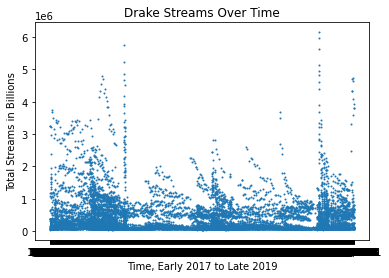

In [ ]:
drake = drakegraph.plot.scatter(x='date',
                      y='streams', s=1)
plt.ylabel('Total Streams in Billions')
plt.xlabel('Time, Early 2017 to Late 2019')
plt.title('Drake Streams Over Time')

This visualization tracks Drake's streams over all three years. From this plot you can see that Drake has a consitant and solid follower base and two evident spikes in streams which are most likely associated with new songs.

In [ ]:
edsheerandf = df[(df.artist == "Ed Sheeran")]

In [ ]:
edsheerandf

,title,rank,date,artist,region,chart,trend,streams,year
339,Shape of You,40,3/1/2018,Ed Sheeran,Australia,top200,MOVE_UP,81955,2018
384,Perfect,35,3/1/2018,Ed Sheeran,Canada,top200,MOVE_UP,67433,2018
448,Shape of You,49,3/1/2018,Ed Sheeran,United Kingdom,top200,MOVE_DOWN,109926,2018
533,Shape of You,34,3/2/2018,Ed Sheeran,Australia,top200,MOVE_UP,89250,2018
549,Perfect,50,3/2/2018,Ed Sheeran,Australia,top200,MOVE_UP,69611,2018
...,...,...,...,...,...,...,...,...,...
361767,Shape of You,45,1/31/2018,Ed Sheeran,Canada,top200,MOVE_DOWN,61152,2018
361814,Perfect Duet (Ed Sheeran & Beyoncé),42,1/31/2018,Ed Sheeran,United Kingdom,top200,MOVE_DOWN,137165,2018
361815,Shape of You,43,1/31/2018,Ed Sheeran,United Kingdom,top200,SAME_POSITION,130711,2018
361818,Perfect,46,1/31/2018,Ed Sheeran,United Kingdom,top200,MOVE_DOWN,124817,2018


In [ ]:
edgraph=edsheerandf[['date', 'streams']]

In [ ]:
edgraph

,date,streams
339,3/1/2018,81955
384,3/1/2018,67433
448,3/1/2018,109926
533,3/2/2018,89250
549,3/2/2018,69611
...,...,...
361767,1/31/2018,61152
361814,1/31/2018,137165
361815,1/31/2018,130711
361818,1/31/2018,124817


Text(0.5, 1.0, 'Ed Sheeran Streams Over Time')

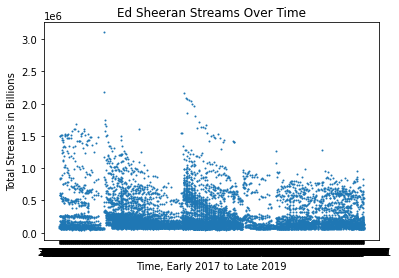

In [ ]:
ed = edgraph.plot.scatter(x='date',
                      y='streams', s=1)
plt.ylabel('Total Streams in Billions')
plt.xlabel('Time, Early 2017 to Late 2019')
plt.title('Ed Sheeran Streams Over Time')

This visualization tracks Ed Sheeran's streams over all three years. From this plot you can see that similar to Drake, Ed Sheeran has a consitant and solid follower base but unlike Drake and Post Malone, Ed Sheeran has more spikes (dramatic upticks in streams most likely attributed to a new song release).

### Calculating how "mainstream" a person's music taste is
Lastly, I decided to take this data and my findings and apply them to my own friends. I wanted to see how "basic" or "mainstream" my friend's music tastes were. In order to do this here are the steps that I took: 
- Surveyed my friend group and asked them to record their top 3 most played artists
- Created a dataset from the survey results
- Took the dataset from the all regions streaming section and manipulated it so that it just had two columns, artist and sum of all their streams
- I then calculated the sum of all streams in all four regions over all three years (104,358,975,705 streams)
- I made a new dataset which featured a column called popularity score percent where I took the total number of streams of the featured artist and divided it by the total streams, then multiplied it by 100
- Each artist was then assigned a popularity score 
- I was then able to merge my two dataframes together by artist
- I then created my final data frame with the mainstream score which came from adding up every friend's 3 artist popularity scores

In a perfect world I would be able to make this model more replicable by figuring out a way to code in Python so that the machine automatically creates a new dataframe with a friend's top three artist's popularity scores added together. Additionally, in a perfect world, friends with music preferences not on the Top 200 lists should be counted as a zero and songs with artists who are featured on the song but not the primary singer should also be accounted for. This model of calculating mainstream scores is not perfect, but it is a start and I was able to see how "basic" my friends music tastes are.

This personal experiment came at a perfect time because [Spotify Wrapped](https://) was recently released and it is all the buzz accross Gen Zers and all over social media.  In my opinion, Spotify Wrapped is one of the most incredible marketing campaigns to ever launch because it encourages people to be proud users and ambassadors of Spotify. In short, Spotify Wrapped is when at the end of the year (Decemeber 1) Spotify releases your data in the form of individualized, repostable content that shows your personal top songs and artists of the year. The reason why I think it is a genius marketing campaign is because it sparks conversion and gets users excited to share their favorite artists and songs with their friends. 

In [ ]:
frienddf = pd.read_csv("friend data.csv") 

In [ ]:
frienddf

,friend,artist
0,Riley,Harry Styles
1,Riley,Adele
2,Riley,Ariana Grande
3,Tyler,Lewis Capaldi
4,Tyler,Anderson .Paak
5,Tyler,Khalid
6,Zenko,Lil Wayne
7,Zenko,Harry Styles
8,Zenko,Lady Gaga
9,Bella,Harry Styles


In [ ]:
streamstotal= new_df[['artist', 'sumstreams']]

In [ ]:
streamstotal

,artist,sumstreams
358,Drake,4659276639
985,Post Malone,3885515577
599,Juice WRLD,2678846471
84,Ariana Grande,2562433264
392,Ed Sheeran,2473124563
...,...,...
189,Bow Wow Wow,65197
102,Avril Lavigne,63479
487,Harry Belafonte,61480
175,"Black Eyed Peas, Shakira",58435


In [ ]:
totalstreams = streamstotal['sumstreams'].sum()

In [ ]:
totalstreams

104358975705

In [ ]:
streamstotal['popularity score percent'] = streamstotal.apply(lambda row: row.sumstreams /
                                  (totalstreams)*100, axis = 1)

In [ ]:
print(streamstotal)

                         artist  sumstreams  popularity score percent
358                       Drake  4659276639                  4.464663
985                 Post Malone  3885515577                  3.723221
599                  Juice WRLD  2678846471                  2.566954
84                Ariana Grande  2562433264                  2.455403
392                  Ed Sheeran  2473124563                  2.369824
..                          ...         ...                       ...
189                 Bow Wow Wow       65197                  0.000062
102               Avril Lavigne       63479                  0.000061
487             Harry Belafonte       61480                  0.000059
175    Black Eyed Peas, Shakira       58435                  0.000056
832  Marvin Gaye, Tammi Terrell       55577                  0.000053

[1325 rows x 3 columns]


In [ ]:
streamstotal[streamstotal['artist'] == 'Harry Styles']

,artist,sumstreams,popularity score percent
488,Harry Styles,829109641,0.794479


In [ ]:
mergeddf = pd.merge(frienddf, streamstotal, on = 'artist', how = 'inner')

In [ ]:
mergeddf.head()

,friend,artist,sumstreams,popularity score percent
0,Riley,Harry Styles,829109641,0.794479
1,Zenko,Harry Styles,829109641,0.794479
2,Bella,Harry Styles,829109641,0.794479
3,Sophie,Harry Styles,829109641,0.794479
4,Riley,Adele,375176688,0.359506


In [ ]:
streamstotal[streamstotal['artist'] == 'Harry Styles']

,artist,sumstreams,popularity score percent
488,Harry Styles,829109641,0.794479


In [ ]:
mergeddf

,friend,artist,sumstreams,popularity score percent
0,Riley,Harry Styles,829109641,0.794479
1,Zenko,Harry Styles,829109641,0.794479
2,Bella,Harry Styles,829109641,0.794479
3,Sophie,Harry Styles,829109641,0.794479
4,Riley,Adele,375176688,0.359506
5,Bella,Adele,375176688,0.359506
6,Riley,Ariana Grande,2562433264,2.455403
7,Tyler,Lewis Capaldi,864224337,0.828127
8,Tyler,Anderson .Paak,682875,0.000654
9,Tyler,Khalid,1325388342,1.270028


In [ ]:
Sophie = mergeddf.loc[mergeddf['friend'] == 'Sophie', 'popularity score percent'].sum()

In [ ]:
Sophie

3.384585102660001

In [ ]:
Hank = mergeddf.loc[mergeddf['friend'] == 'Hank', 'popularity score percent'].sum()

In [ ]:
Hank

4.791472960730129

In [ ]:
Bella = mergeddf.loc[mergeddf['friend'] == 'Bella', 'popularity score percent'].sum()

In [ ]:
Bella

2.3314070692660405

In [ ]:
Tyler = mergeddf.loc[mergeddf['friend'] == 'Tyler', 'popularity score percent'].sum()

In [ ]:
Tyler

2.0988089804479175

In [ ]:
Riley = mergeddf.loc[mergeddf['friend'] == 'Riley', 'popularity score percent'].sum()

In [ ]:
Riley

3.6093872784337133

In [ ]:
Alex = mergeddf.loc[mergeddf['friend'] == 'Alex', 'popularity score percent'].sum()

In [ ]:
Alex

0.5624151579056551

In [ ]:
Zenko = mergeddf.loc[mergeddf['friend'] == 'Zenko', 'popularity score percent'].sum()

In [ ]:
Zenko

1.2073610779409287

In [ ]:
d = {'friend': ['Hank', 'Sophie','Tyler','Bella','Alex', 'Riley','Zenko'], 'mainstreamscore': [Hank, Sophie,Tyler,Bella, Alex, Riley,Zenko]}
mainstream = pd.DataFrame(data=d)
mainstream

,friend,mainstreamscore
0,Hank,4.791473
1,Sophie,3.384585
2,Tyler,2.098809
3,Bella,2.331407
4,Alex,0.562415
5,Riley,3.609387
6,Zenko,1.207361


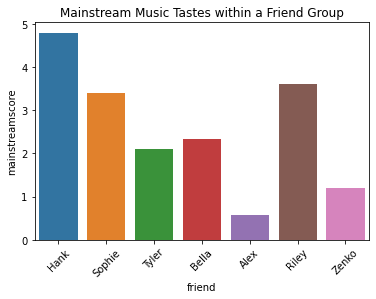

In [ ]:
mainstreamfriends = sns.barplot(y=mainstream.mainstreamscore, x=df.friend)
mainstreamfriends.set_title("Mainstream Music Tastes within a Friend Group")
mainstreamfriends.set_xticklabels(mainstreamfriends.get_xticklabels(), rotation=45);

This graph compares the mainstream scores between the friends in my friend group. Alex has the least basic and most niche music taste, while Hank seems to listen to what everyone else is listening to. This is a great model to predict what kinds of music people are going to like and has potential to improve.